# 가설검정
## 가설검정의 가정

In [2]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from scipy.stats import normaltest, shapiro, skew, kurtosis, bartlett, levene
from hossam import load_data
from pandas import melt, DataFrame


## 그래프 초기화

In [3]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

## 데이터 가져오기

In [4]:
origin = load_data('two_store')
origin.head()

[data] https://data.hossam.kr/data/lab10/two_store.xlsx
[desc] 동일한 제품을 판매하고 있는 서로 다른 두 지역의 매장의 100일간의 일별 매출액을 기록한 가상의 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,store1,store2
0,34,63
1,63,85
2,57,75
3,50,48
4,37,58


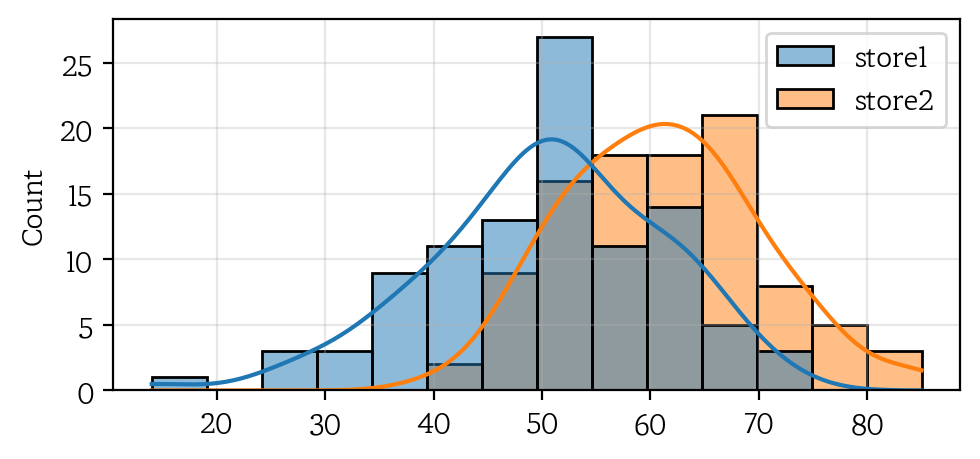

In [5]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# histogram 그리기
sb.histplot(data = origin, kde = True)

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

## 데이터 정규성 확인
### shapiro 검정 
- 까다로운 편이라 잘 사용하지 않음

In [6]:
# store1에 대한 정규성 검정
s, p = shapiro(origin['store1'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p > 0.05)

'statistic: 0.979, p-value: 0.109, 정규성 충족 여부: True'

In [7]:
s, p = shapiro(origin['store2'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p > 0.05)

'statistic: 0.991, p-value: 0.731, 정규성 충족 여부: True'

- 아주 이상적인 데이터이지만, 이런 데이터 거의 없음

### Normal Test
#### Normal Test를 통한 정규성 검정
- 주로 사용하는 편

In [8]:
s, p = normaltest(origin['store1'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p > 0.05)

'statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True'

In [9]:
s, p = normaltest(origin['store2'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s, p, p > 0.05)

'statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True'

- p-value > 0.05 이므로 정규성을 따른다

In [10]:
fmt = '[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}'
for c in origin.columns:
    s, p = normaltest(origin[c])
    print(fmt.format(c, s, p, p > 0.05))

[store1] statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True
[store2] statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True


In [11]:
normal_dist = True # 정규성 만족 여부
data = origin.copy() # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))
if normal_dist:
 n = "Bartlett"
 s, p = bartlett(*fields)
else:
 n = "Levene"
 s, p = levene(*fields)
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 3.143, p-value: 0.076, 정규성 충족 여부: True


## 정규성, 등분산성 검정 결과표 만들기

In [12]:
data = melt(origin, var_name = 'store', value_name = 'value')
data

,store,value
0,store1,34
1,store1,63
2,store1,57
3,store1,50
4,store1,37
...,...,...
195,store2,69
196,store2,51
197,store2,65
198,store2,59


In [13]:
xname = 'store'
yname = 'value'
u1 = data[xname].unique()
equal_var_fields = []
normal_dist = True
report = []
for i in u1:
 filtered_data = data[data[xname] == i][yname]
 equal_var_fields.append(filtered_data)
 s, p = normaltest(filtered_data)
 normalize = p > 0.05
 report.append({
'field': i,
'statistic': s,
'p-value': p,
'result': normalize
 })
 normal_dist = normal_dist and normalize
if normal_dist:
 n = 'Bartlett'
 s, p = bartlett(*equal_var_fields)
else:
 n = 'Levene'
 s, p = levene(*equal_var_fields)
report.append({
'field': n,
'statistic': s,
'p-value': p,
'result': p > 0.05
})
report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
store1,5.651229,0.059272,True
store2,1.173772,0.556056,True
Bartlett,3.143307,0.076239,True
